In [36]:
# https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
import pandas as pd
# Load data
data = pd.read_csv('Group16_ClassificationData.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
# Splitting data
# Import train_test_split function
from sklearn.model_selection import train_test_split
import numpy as np
outcomes = data['Outcome'] # outcomes is not an array. It is a column in a dataset. So we use the NumPy np.ravel() function to convert that to an array.
features = data.iloc[:,0:8]
X = features
y = np.ravel(outcomes) # converting outcomes into an array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # 80% training and 20% test

In [38]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() # arrange data into standard normal distribution (mean = 0, unit variance) -- improves accuracy
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Text(0, 0.5, 'Mean Error')

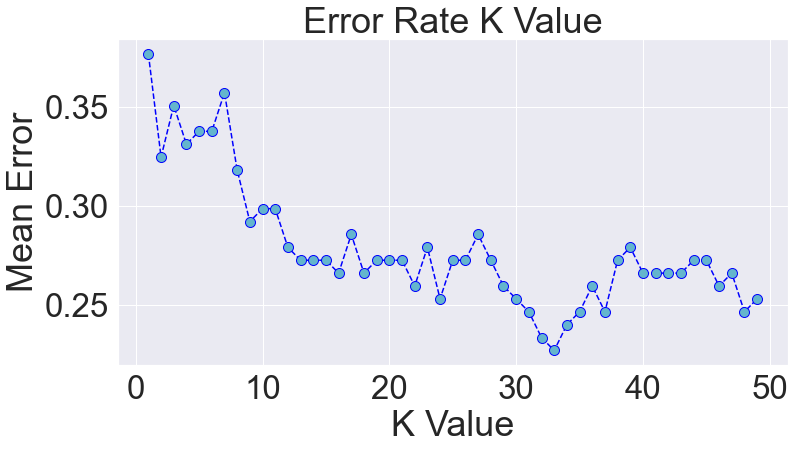

In [39]:
# Import knearest neighbors Classifier model
# https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 50
error = []
for i in range(1, 50):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=i)
    #Train the model using the training sets
    knn.fit(X_train, y_train)
    #Predict the response for test dataset
    y_pred_i = knn.predict(X_test)
    error.append(np.mean(y_pred_i != y_test))
    
plt.figure(figsize =(12,6))
plt.plot(range(1,50), error, color='blue', linestyle='dashed', marker='o', markerfacecolor='c', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [40]:
# Based on the plot above, the K value with the lowest Mean error value is the most optimal KNN
# Therefore, the most optimal K = 33
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=33)
#Train the model using the training sets
knn.fit(X_train, y_train)
#Predict the response for train dataset
y_pred_train = knn.predict(X_train)
print('Train Accuracy: ',metrics.accuracy_score(y_train, y_pred_train))
#Predict the response for test dataset
y_pred_test = knn.predict(X_test)
print('Test Accuracy: ',metrics.accuracy_score(y_test, y_pred_test))

Train Accuracy:  0.7703583061889251
Test Accuracy:  0.7727272727272727


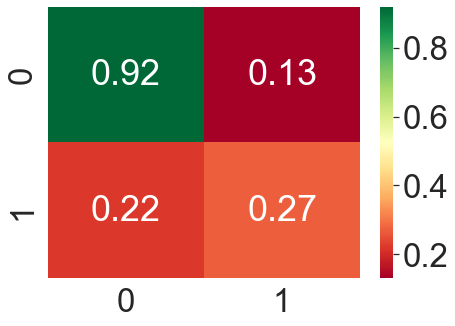

In [41]:
# Print Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
plt.figure(figsize = (7,5))
sns.set(font_scale=3.0)
dataplot = sns.heatmap(confusion_matrix(y_test, y_pred_test)/100,annot=True, fmt='.2f', cmap='RdYlGn')

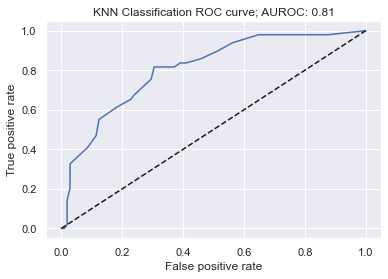

In [42]:
# ROC and AUC
# https://builtin.com/data-science/evaluating-classification-models
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = knn.predict_proba(np.array(X_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)
plt.title(f'KNN Classification ROC curve; AUROC: {AUROC}');
plt.show()

C:\Users\lubab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lubab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'KNN Classification'}>

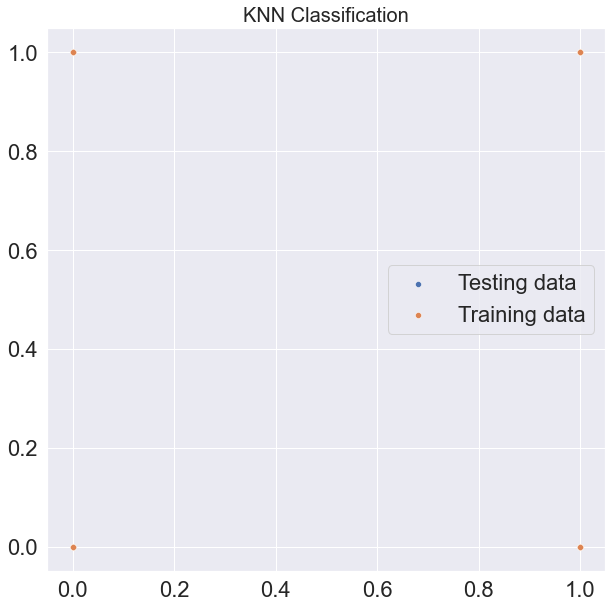

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
plt.title("KNN Classification", fontsize=20)
sns.set(font_scale = 2)
sns.scatterplot(y_test, y_pred_test, label="Testing data")
sns.scatterplot(y_train, y_pred_train, label="Training data")